📌 Netflix EDA Project — Description

📊 Project Title:
Exploratory Data Analysis of Netflix Titles

🧠 Overview:
This project explores and analyzes the Netflix catalog using real-world data from Kaggle. The goal was to uncover insights about Netflix's content types, genre distribution, top content-producing countries, and content growth trends over time.

🎯 Objectives:
Understand the distribution of Movies vs TV Shows on Netflix.

Identify the most frequent genres and content-producing countries.

Analyze content addition trends by year.

Practice real-world data cleaning and visualization techniques in Python.

🧰 Tools & Technologies:
Python (Pandas, NumPy)

Visualization: Matplotlib, Seaborn

Jupyter Notebook

📈 Key Findings:
Movies make up the majority (≈70%) of Netflix's content.

The United States dominates as the top content producer, followed by India and the UK.

Drama, International Movies, and Comedies are the most common genres.

Content additions to Netflix peaked around 2019, indicating strong pre-pandemic growth.

📂 Dataset:
Source: Netflix Movies and TV Shows Dataset (Kaggle)

Size: 8,800+ entries with features like title, director, cast, country, date added, genre, duration, and description.

📌 Skills Demonstrated:
Data cleaning and preprocessing (handling missing values, datetime conversion)

Exploratory data analysis (EDA)

Visual storytelling using Matplotlib and Seaborn

Generating actionable insights from real-world data

📄 Output:
Jupyter Notebook with full EDA steps, visualizations, and commentary

Insight summary for business storytelling

In [49]:
# Netflix EDA Project

## Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
# Load the data
df = pd.read_csv(r'C:\Users\Sam_Ke\Downloads\netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [42]:
#Check Missing Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [63]:
# Drop rows where 'date_added' or 'rating' are missing (only a few)
df = df.dropna(subset=['date_added', 'rating'])

In [65]:
# Fill missing categorical fields with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown') 

In [61]:
print(type(df))  # Check if df is a DataFrame
print(df.columns)  # See available columns

<class 'pandas.core.frame.DataFrame'>
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [67]:
#Check Missing Values after Cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

📊 1. Movies vs TV Shows Count

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_4900\1570678303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


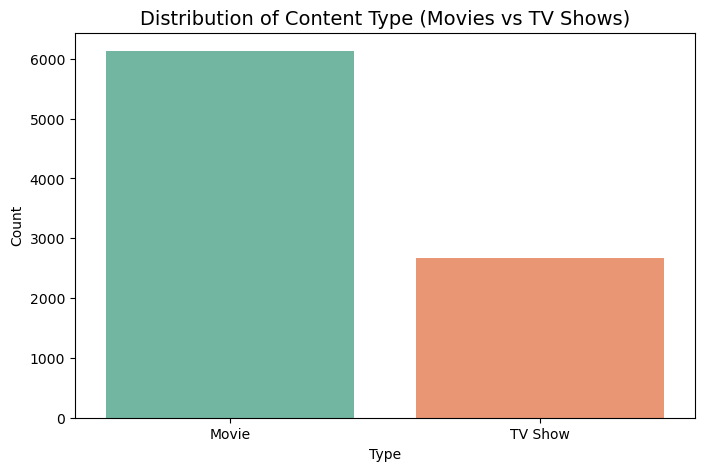

In [69]:

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


🌍 2. Top 10 Countries with Most Content

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_4900\3728893893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


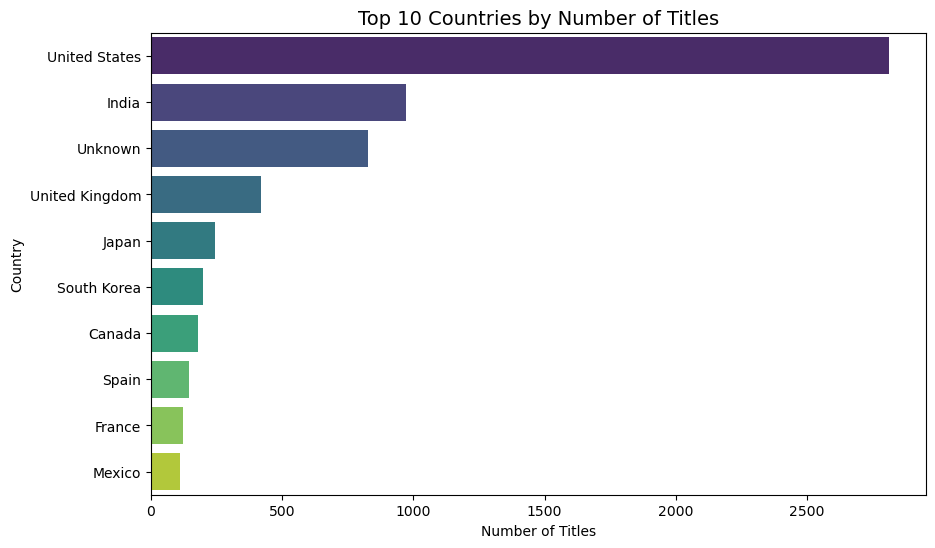

In [71]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Titles', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

📈 3. Content Added Over the Years

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_4900\1341594297.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='viridis')


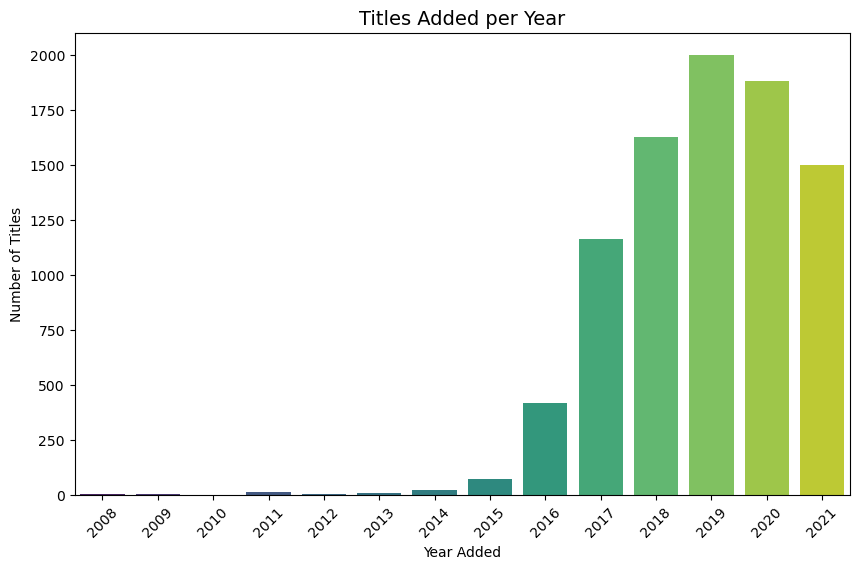

In [83]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].astype('Int64')  # Uses Pandas' nullable integer type

# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='viridis')
plt.title('Titles Added per Year', fontsize=14)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Key Insights:
- Netflix has more Movies than TV Shows in its catalog.
- The United States dominates the content library, followed by India and the UK.
- The number of new titles peaked in 2019, suggesting heavy growth before the pandemic.